In [1]:
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import shapely.geometry
import geopandas as gpd
import pandas as pd
import numpy as np

import sys
sys.path.insert(0, r"/Users/hygson/Documents/Python/Funcoes")
from minhasfuncoes import municipio_das_coordenadas
from radiodifusao import pbfm, pbtvd

In [5]:
df = pbfm()
df_fm = df[df['Serviço'] == 'FM']

In [7]:
df_fm.head()

,ID,Serviço,Serviço Mongo,UF,Município,Município-UF,Canal,Decalagem,Frequência,Classe,...,Data,Observações,HCI,Latitude,Longitude,Latitude GMS,Longitude GMS,N.º do Serviço,Descrição do Status,Finalidade
0,57dbac0d0f92f,FM,FM,AC,Acrelândia,Acrelândia - AC,231,Nenhuma,94.1,A2,...,2023-05-05 15:27:53,Nenhuma,55.5,-10.073333,-67.064722,10S04 24,67W03 53,230,Canal Licenciado,Comercial
1,57dbac0d14b10,FM,FM,AC,Assis Brasil,Assis Brasil - AC,215,Nenhuma,90.9,C,...,2021-03-16 15:36:45,CANAL RESERVADO PARA O PNO DE RADIODIFUSÃO EDU...,0.0,-10.941389,-69.566944,10S56 29,69W34 01,230,Canal Vago,Educativo
2,57dbac0d16914,FM,FM,AC,Brasiléia,Brasiléia - AC,212,Nenhuma,90.3,C,...,2021-08-02 11:41:51,Nenhuma,48.8,-11.015278,-68.743889,11S00 55,68W44 38,230,Canal Out. - Aguardando Dados da Estação,Comercial
3,57dbac0d1a841,FM,FM,AC,Bujari,Bujari - AC,204,Nenhuma,88.7,C,...,2021-03-16 15:36:45,Nenhuma,0.0,-9.830556,-67.952222,9S49 50,67W57 08,230,Canal Vago,Comercial
4,57dbac0d1be73,FM,FM,AC,Capixaba,Capixaba - AC,203,Nenhuma,88.5,C,...,2021-03-16 15:36:45,CANAL RESERVADO PARA O PNO DE RADIODIFUSÃO EDU...,0.0,-10.572778,-67.675556,10S34 22,67W40 32,230,Canal Vago,Educativo


### Estações de FM

In [8]:
# Conversão de latitudes e longitudes para geodataframe
geometry = gpd.points_from_xy(df_fm['Longitude'], df_fm['Latitude'])
gdf_fm = gpd.GeoDataFrame(df_fm, crs='EPSG:4674', geometry=geometry)
colunas_inspecao = ['UF', 'Município', 'Canal', 'Frequência', 'Classe', 'Serviço', 'Caráter', 'Status', 'Latitude', 'Longitude', 'ERP', 'HCI']
gdf_fm[colunas_inspecao].head(3)

,UF,Município,Canal,Frequência,Classe,Serviço,Caráter,Status,Latitude,Longitude,ERP,HCI
0,AC,Acrelândia,231,94.1,A2,FM,Primário,FM-C4,-10.073333,-67.064722,78.9986,55.5
1,AC,Assis Brasil,215,90.9,C,FM,Primário,FM-C0,-10.941389,-69.566944,0.3000,0.0
2,AC,Brasiléia,212,90.3,C,FM,Primário,FM-C2,-11.015278,-68.743889,0.3000,48.8


### Municípios

In [9]:
path_municipios = r"/Users/hygson/Documents/Dados/Municipios/BR_Municipios_2022.shp"
gdf_municipios = gpd.read_file(path_municipios)
gdf_municipios.head(3)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."


### Gráfico

In [11]:
municipio = 'Manaus'
filtro1 = gdf_municipios['NM_MUN'] == municipio
filtro2 = gdf_fm['Município'] == municipio

<Axes: >

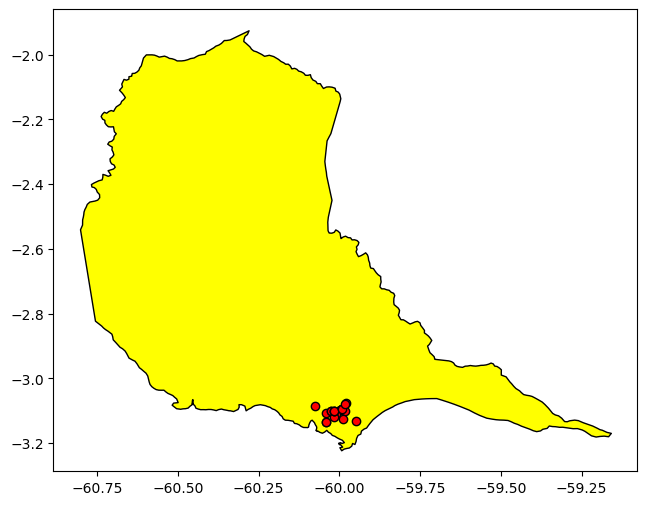

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
#ax.grid(color='grey', linestyle='--', linewidth=0.5)

gdf_municipios[filtro1].plot(ax=ax, color='yellow', edgecolor='black', linewidth=1)
gdf_fm[filtro2].plot(ax=ax, color='red', edgecolor='black', linewidth=1)

In [14]:
gdf_fm[filtro2][colunas_inspecao].sort_values(by = ['Status', 'Frequência', 'Classe'])

,UF,Município,Canal,Frequência,Classe,Serviço,Caráter,Status,Latitude,Longitude,ERP,HCI
6330,AM,Manaus,213,90.5,E3,FM,Primário,FM-C0,-3.100000,-60.016700,60.0000,0.00
169,AM,Manaus,274,102.7,B1,FM,Primário,FM-C0,-3.101944,-60.025000,3.0000,0.00
6331,AM,Manaus,222,92.3,A2,FM,Primário,FM-C2,-3.100000,-60.016700,30.0000,0.00
162,AM,Manaus,226,93.1,A3,FM,Primário,FM-C2,-3.133333,-60.041667,15.0000,63.16
165,AM,Manaus,245,96.9,A3,FM,Primário,FM-C3,-3.075278,-59.980278,15.0000,2.00
161,AM,Manaus,209,89.7,A3,FM,Primário,FM-C4,-3.094444,-59.990833,15.0000,50.00
6332,AM,Manaus,229,93.7,A4,FM,Primário,FM-C4,-3.100000,-60.016700,5.0000,82.20
163,AM,Manaus,232,94.3,A3,FM,Primário,FM-C4,-3.108330,-60.041670,25.5600,70.00
164,AM,Manaus,236,95.1,A3,FM,Primário,FM-C4,-3.094170,-59.991970,15.3373,95.28
6333,AM,Manaus,239,95.7,A4,FM,Primário,FM-C4,-3.124170,-59.990000,5.0000,126.00
